In [35]:
%pylab inline
import pandas as pd

from IPython.display import display
from collections import Counter

pd.set_option('display.max_columns', 500)

Populating the interactive namespace from numpy and matplotlib


In [2]:
CORRELATED_COMPANY_N = 10
COMPANY_TICKER = 'AAL'

# Data 
## securities.csv

기업에 대한 분류및 기타 정보

In [36]:
securities = pd.read_csv('/dataset/stock-market/nyse/securities.csv')

# GICS Sector를 카테고리로 만듬
securities['Sector'] = securities['GICS Sector'].astype('category').cat.codes
print('Shape:', securities.shape)
display(securities.head())

Shape: (505, 9)


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,Sector
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,5
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,4
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,4
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,6
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877,6


## fundamentals.csv

년도별 기업의 회계자료

In [51]:
fundamentals = pd.read_csv('/dataset/stock-market/nyse/fundamentals.csv', index_col=0)
fundamentals['Period Ending'] = pd.to_datetime(fundamentals['Period Ending'])

display(fundamentals.head())
fdm_company = fundamentals[fundamentals['Ticker Symbol'] == COMPANY_TICKER]

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322500e+10,1.175000e

## prices-split-adjusted.csv

주가 정보

In [ ]:
prices = pd.read_csv('/dataset/stock-market/nyse/prices-split-adjusted.csv', index_col=0)
prices = prices[prices.symbol.str.contains('|'.join(fundamentals['Ticker Symbol'].unique()))]
aal = prices[prices.symbol == COMPANY_TICKER]

print('Unique Company:', len(prices['symbol'].unique()))
display(prices.head())

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0


### Correlation

In [55]:
corr_companies = []
for symbol in prices.symbol.unique():
    if COMPANY_TICKER == symbol:
        continue
    company = prices[prices.symbol == symbol]
    corr = aal['open'].corr(company['open'])
    corr_companies.append((symbol, corr))
corr_companies = sorted(corr_companies, key=lambda x: -x[1])

selected_companies = []
selected_companies += corr_companies[:int(CORRELATED_COMPANY_N/2)]
selected_companies += corr_companies[-int(CORRELATED_COMPANY_N/2):]

display(selected_companies)

[('DAL', 0.97652854291542202),
 ('UAL', 0.97362318047276208),
 ('MAR', 0.96933344962939016),
 ('TEL', 0.95867438086216905),
 ('HBI', 0.95559500324138691),
 ('FE', -0.70682669837974499),
 ('APA', -0.72103817584649965),
 ('FCX', -0.74461042657817422),
 ('RIG', -0.81728669098316364),
 ('NEM', -0.86318370678733147)]

[('DAL', 0.97652854291542202),
 ('UAL', 0.97362318047276208),
 ('MAR', 0.96933344962939016),
 ('TEL', 0.95867438086216905),
 ('HBI', 0.95559500324138691),
 ('WFC', 0.95547921835728034),
 ('AGN', 0.9535788385520797),
 ('DIS', 0.95328408542178811),
 ('CAH', 0.95258741084257514),
 ('FDX', 0.95237157879784184),
 ('CELG', 0.9512631926394236),
 ('ILMN', 0.94959296435386265),
 ('TXT', 0.94948752976633122),
 ('GILD', 0.94674856991877543),
 ('SIG', 0.94628215754699818),
 ('ALL', 0.94508962751330594),
 ('BA', 0.94349029050428002),
 ('MCO', 0.94319637876741458),
 ('HAR', 0.94246273011616177),
 ('MCK', 0.94164207191031579),
 ('ABC', 0.94066834986250625),
 ('MMM', 0.93923889403940886),
 ('TWX', 0.93904693045656551),
 ('APD', 0.93811938367672454),
 ('AMP', 0.93802072304733131),
 ('AAP', 0.93782689946801734),
 ('PNC', 0.9374213712985392),
 ('PPG', 0.93737372375270456),
 ('CVS', 0.9371830248072206),
 ('WBA', 0.93700039068441798),
 ('HBAN', 0.93692684925882908),
 ('LUV', 0.93472014193820618),
 ('APH', 

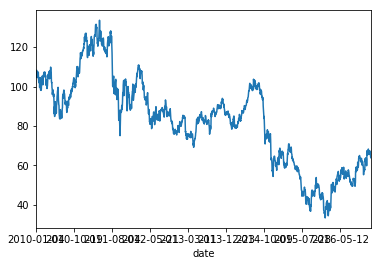

In [54]:
prices[prices.symbol == 'APA'].open.plot()

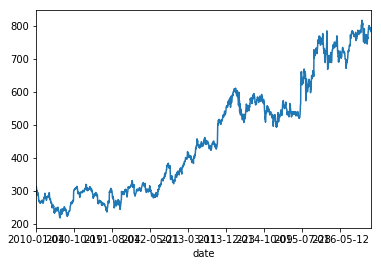

In [55]:
goog.open.plot()